# BUSINESS CONFIDENCE INDEX
###### The BCI is an indicator for the confidence of businesses regarding production developments, and the movement of finished goods. A BCI value above 100 indicates an increase in business confidence and potential growth in economic activity. A value below 100 indicates potential decreases in business performance in the future (source: https://www.statista.com/statistics/1253158/us-monthly-business-price-index/#:~:text=The%20BCI%20is%20an%20indicator%20for%20the%20confidence,potential%20decreases%20in%20business%20performance%20in%20the%20future.)

IMPORT THE LIBRARIES REQUIRED 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

UPLOAD THE REQUIRED DATASETS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Business confidence Index 2003 to 2023.csv to Business confidence Index 2003 to 2023 (2).csv
Saving Business confidence Index_Country names.csv to Business confidence Index_Country names (2).csv


READ THE DATAS AS DATAFRAME

In [101]:
df1 = pd.read_csv("Business confidence Index 2003 to 2023.csv")
country_names_df2 = pd.read_csv("Business confidence Index_Country names.csv")
country_names_df2.head()
df1.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-02,101.6878,NaN
1,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-03,101.5513,NaN
2,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-04,101.2344,NaN
3,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-05,100.8609,NaN
4,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-06,100.6054,NaN


COUNTRY CODE & COUNTRY NAMES

In [102]:
country_names_df2

,COUNTRY_CODE,COUNTRY
0,AUS,Australia
1,AUT,Austria
2,BEL,Belgium
3,BRA,Brazil
4,CAN,Canada
5,CHE,Switzerland
6,CHL,Chile
7,CHN,China
8,COL,Colombia
9,CZE,Czech Republic


In [103]:
print(df1.columns)

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


In [104]:
df1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-02,101.6878,NaN
1,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-03,101.5513,NaN
2,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-04,101.2344,NaN
3,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-05,100.8609,NaN
4,ZAF,BCI,AMPLITUD,LTRENDIDX,M,2003-06,100.6054,NaN
...,...,...,...,...,...,...,...,...
11586,EU27_2020,BCI,AMPLITUD,LTRENDIDX,M,2022-08,101.1512,NaN
11587,EU27_2020,BCI,AMPLITUD,LTRENDIDX,M,2022-09,100.8730,NaN
11588,EU27_2020,BCI,AMPLITUD,LTRENDIDX,M,2022-10,100.6880,NaN
11589,EU27_2020,BCI,AMPLITUD,LTRENDIDX,M,2022-11,100.6301,NaN


EXCLUDE COUNTRIES WHICH DO NOT HOLD ALL THE REQD DATA

In [105]:
countries_to_remove = ['OECD', 'OECDE', 'CRI', 'G-7', 'G-20', 'EU27_2020', 'EA19', 'ZAF', 'RUS']
# select only the rows that do not contain the countries to remove
df1 = df1[~df1['LOCATION'].isin(countries_to_remove)]
df1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
467,ITA,BCI,AMPLITUD,LTRENDIDX,M,2003-02,100.7594,NaN
468,ITA,BCI,AMPLITUD,LTRENDIDX,M,2003-03,100.6432,NaN
469,ITA,BCI,AMPLITUD,LTRENDIDX,M,2003-04,100.4356,NaN
470,ITA,BCI,AMPLITUD,LTRENDIDX,M,2003-05,100.2159,NaN
471,ITA,BCI,AMPLITUD,LTRENDIDX,M,2003-06,100.0633,NaN
...,...,...,...,...,...,...,...,...
10956,COL,BCI,AMPLITUD,LTRENDIDX,M,2022-08,101.1249,NaN
10957,COL,BCI,AMPLITUD,LTRENDIDX,M,2022-09,100.6976,NaN
10958,COL,BCI,AMPLITUD,LTRENDIDX,M,2022-10,100.6723,NaN
10959,COL,BCI,AMPLITUD,LTRENDIDX,M,2022-11,100.7601,NaN


In [106]:
# Check for null values
null_counts = df1.isnull().sum()

# Print the number of null values in each column
print(null_counts)

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    9538
dtype: int64


CREATE MEAN VALUE OF MONTHLY BCI VALUES AND CONVERT INTO YEARLY VALUE 

In [107]:
# Extract the year from the TIME column
df1["YEAR"] = pd.to_datetime(df1["TIME"]).dt.year

# Group the data by location and year, and calculate the mean
mean_by_year = df1.groupby(["LOCATION", "YEAR"])["Value"].mean()

mean_by_year.head()

<ipython-input-107-1a5214ac364a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["YEAR"] = pd.to_datetime(df1["TIME"]).dt.year


LOCATION  YEAR
AUS       2003    100.620200
          2004    100.430558
          2005     99.581329
          2006     99.858053
          2007    100.354375
Name: Value, dtype: float64

In [108]:
# convert the Pandas Series to a DataFrame with one column
mean_by_year_df = pd.DataFrame(mean_by_year)

# reset the index to create a MultiIndex with 'LOCATION' and 'YEAR' columns
mean_by_year_df = mean_by_year_df.reset_index()

# rename the third column to 'MEAN'
mean_by_year_df = mean_by_year_df.rename(columns={mean_by_year_df.columns[2]: 'BCI_MEAN'})

# display the resulting DataFrame
mean_by_year_df

,LOCATION,YEAR,BCI_MEAN
0,AUS,2003,100.620200
1,AUS,2004,100.430558
2,AUS,2005,99.581329
3,AUS,2006,99.858053
4,AUS,2007,100.354375
...,...,...,...
795,USA,2018,101.250658
796,USA,2019,99.540193
797,USA,2020,99.781318
798,USA,2021,101.655975


### TOP 10 COUNTRIES DURING THE YEAR 2022

In [ ]:
mean_by_year_df.to_csv('mean_by_year.csv', index=False)

COMPARISON BETWEEN COUNTRIES FOR TEN YEARS (2003 to 2011) & (2012 to 2022)

In [109]:
# select rows for years 2003-2011
df_2003_2011 = mean_by_year_df[mean_by_year_df['YEAR'].between(2003, 2011)]

# sort by mean and select top 20
top_20_2003_2011 = df_2003_2011.sort_values('BCI_MEAN', ascending=False).head(20)

top_20_2003_2011

,LOCATION,YEAR,BCI_MEAN
263,EST,2006,105.891642
524,LTU,2007,105.386833
563,LVA,2006,105.321433
523,LTU,2006,105.076717
562,LVA,2005,104.960100
564,LVA,2007,104.511417
560,LVA,2003,104.391445
561,LVA,2004,104.294533
163,COL,2006,104.025950
264,EST,2007,103.967783


In [126]:
# select rows for years 2012-2022
df_2012_2022 = mean_by_year_df[mean_by_year_df['YEAR'].between(2012, 2022)]

# sort by mean and select top 20
top_20_2012_2022 = df_2012_2022.sort_values('BCI_MEAN', ascending=False).head(20)

top_20_2012_2022

,LOCATION,YEAR,BCI_MEAN
278,EST,2021,104.095983
538,LTU,2021,103.652167
419,IND,2022,103.578860
338,GBR,2021,103.556119
138,CHL,2021,103.552767
375,HUN,2018,103.510808
758,SWE,2021,103.394408
575,LVA,2018,103.205075
334,GBR,2017,103.103425
734,SVN,2017,103.040492


SHOW BAR GRAPHS FOR BOTH DATAS

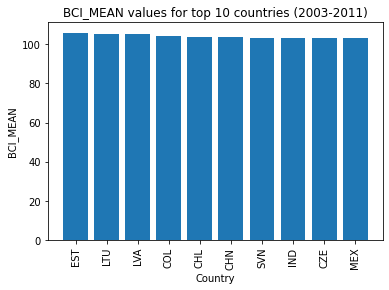

In [111]:
# create a bar chart of BCI_MEAN values for each country
plt.bar(top_20_2003_2011['LOCATION'], top_20_2003_2011['BCI_MEAN'])

# add title and axis labels
plt.title('BCI_MEAN values for top 10 countries (2003-2011)')
plt.xlabel('Country')
plt.ylabel('BCI_MEAN')

# rotate x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()

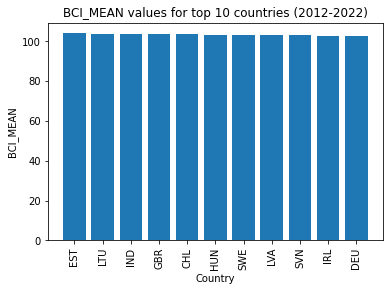

In [112]:
# create a bar chart of BCI_MEAN values for each country
plt.bar(top_20_2012_2022['LOCATION'], top_20_2012_2022['BCI_MEAN'])

# add title and axis labels
plt.title('BCI_MEAN values for top 10 countries (2012-2022)')
plt.xlabel('Country')
plt.ylabel('BCI_MEAN')

# rotate x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()

BUILD ARIMA MODEL FOR PREDICTION

In [113]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mean_by_year.csv to mean_by_year.csv


In [114]:
# Load the data
model_df = pd.read_csv("mean_by_year.csv")

# Set 'YEAR' as the index
model_df = model_df.set_index('ds')

In [115]:
aus_df = model_df.loc[model_df['LOCATION'] == "AUS"]

In [116]:
aus_df

,LOCATION,y
ds,,
2003-01-01,AUS,100.620200
2004-01-01,AUS,100.430558
2005-01-01,AUS,99.581329
2006-01-01,AUS,99.858053
2007-01-01,AUS,100.354375
2008-01-01,AUS,98.777584
2009-01-01,AUS,99.313542
2010-01-01,AUS,100.055921
2011-01-01,AUS,99.901278


In [117]:
model_df

,LOCATION,y
ds,,
2003-01-01,AUS,100.620200
2004-01-01,AUS,100.430558
2005-01-01,AUS,99.581329
2006-01-01,AUS,99.858053
2007-01-01,AUS,100.354375
...,...,...
2018-01-01,USA,101.250658
2019-01-01,USA,99.540193
2020-01-01,USA,99.781318


In [118]:
com_df = pd.DataFrame()
countries = ["AUS", "BRA", "AUT", "BEL", "CAN", "CHE", "CHL", "CHN", "COL", "CZE", "DEU", "DNK", "ESP", "EST", "FIN", "FRA", "GBR", "GRC", "HUN", "IDN", "IND", "IRL", "ISR", "ITA", "JPN", "KOR", "LUX", "LVA", "MEX", "NLD", "NOR", "NZL", "POL", "PRT", "SVK", "SVN", "SWE", "TUR", "USA" ]
for country in countries:
  aus_df = model_df.loc[model_df['LOCATION'] == country]
  print(f"processing {country}")
  # Fit an ARIMA(1,0,0) model to the data
  model = ARIMA(aus_df['y'], order=(1,0,0))
  model_fit = model.fit()

  # Make predictions for the next 5 years
  predictions = model_fit.forecast(steps=5)
  print(country)
  print(type(predictions))
  predictions.columns = [country]
  predictions = predictions.rename(country)
  com_df = pd.concat([com_df, predictions], axis=1)

processing AUS
AUS
<class 'pandas.core.series.Series'>
processing BRA
BRA
<class 'pandas.core.series.Series'>
processing AUT
AUT
<class 'pandas.core.series.Series'>
processing BEL
BEL
<class 'pandas.core.series.Series'>
processing CAN
CAN
<class 'pandas.core.series.Series'>
processing CHE


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

CHE
<class 'pandas.core.series.Series'>
processing CHL
CHL
<class 'pandas.core.series.Series'>
processing CHN
CHN
<class 'pandas.core.series.Series'>
processing COL
COL
<class 'pandas.core.series.Series'>
processing CZE
CZE
<class 'pandas.core.series.Series'>
processing DEU
DEU
<class 'pandas.core.series.Series'>
processing DNK


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

DNK
<class 'pandas.core.series.Series'>
processing ESP
ESP
<class 'pandas.core.series.Series'>
processing EST
EST
<class 'pandas.core.series.Series'>
processing FIN
FIN
<class 'pandas.core.series.Series'>
processing FRA
FRA
<class 'pandas.core.series.Series'>
processing GBR
GBR
<class 'pandas.core.series.Series'>
processing GRC


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

GRC
<class 'pandas.core.series.Series'>
processing HUN
HUN
<class 'pandas.core.series.Series'>
processing IDN
IDN
<class 'pandas.core.series.Series'>
processing IND
IND
<class 'pandas.core.series.Series'>
processing IRL
IRL
<class 'pandas.core.series.Series'>
processing ISR


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

ISR
<class 'pandas.core.series.Series'>
processing ITA
ITA
<class 'pandas.core.series.Series'>
processing JPN
JPN
<class 'pandas.core.series.Series'>
processing KOR
KOR
<class 'pandas.core.series.Series'>
processing LUX
LUX
<class 'pandas.core.series.Series'>
processing LVA
LVA
<class 'pandas.core.series.Series'>
processing MEX


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

MEX
<class 'pandas.core.series.Series'>
processing NLD
NLD
<class 'pandas.core.series.Series'>
processing NOR
NOR
<class 'pandas.core.series.Series'>
processing NZL
NZL
<class 'pandas.core.series.Series'>
processing POL
POL
<class 'pandas.core.series.Series'>
processing PRT


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

PRT
<class 'pandas.core.series.Series'>
processing SVK
SVK
<class 'pandas.core.series.Series'>
processing SVN
SVN
<class 'pandas.core.series.Series'>
processing SWE
SWE
<class 'pandas.core.series.Series'>
processing TUR
TUR
<class 'pandas.core.series.Series'>
processing USA
USA
<class 'pandas.core.series.Series'>


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

PREDICTIONS of BCI for next 5 Years using ARIMA model

In [ ]:
com_df

,AUS,BRA,AUT,BEL,CAN,CHE,CHL,CHN,COL,CZE,...,KOR,LUX,LVA,MEX,NLD,NOR,NZL,POL,PRT,SVK
2023-01-01 00:00:00,100.698745,100.154153,100.242995,100.308075,100.210771,100.686664,99.617955,98.298880,100.797544,99.877920,...,99.182500,100.247003,101.115032,100.060334,100.603387,100.013173,98.878217,99.861419,99.790368,99.105081
2024-01-01 00:00:00,100.537128,100.210543,100.106193,100.303991,99.986637,100.537258,99.976311,98.711880,100.609159,100.081888,...,99.156475,99.927796,101.314525,100.040280,100.450938,100.085640,99.137574,100.099610,99.606700,99.500699
2025-01-01 00:00:00,100.458997,100.234636,100.082999,100.304049,99.956372,100.519805,100.075526,99.034851,100.586012,100.153438,...,99.154201,99.800094,101.423783,100.035494,100.416049,100.104800,99.312546,100.158433,99.534179,99.665033
2026-01-01 00:00:00,100.421226,100.244929,100.079066,100.304048,99.952285,100.517766,100.102995,99.287419,100.583168,100.178537,...,99.154002,99.749005,101.483620,100.034352,100.408064,100.109866,99.430589,100.172959,99.505545,99.733295
2027-01-01 00:00:00,100.402966,100.249327,100.078399,100.304048,99.951733,100.517528,100.110600,99.484931,100.582818,100.187341,...,99.153984,99.728567,101.516392,100.034079,100.406237,100.111205,99.510225,100.176547,99.494239,99.761650


In [119]:
print(com_df)

                            AUS         BRA         AUT         BEL  \
2023-01-01 00:00:00  100.698745  100.154153  100.242995  100.308075   
2024-01-01 00:00:00  100.537128  100.210543  100.106193  100.303991   
2025-01-01 00:00:00  100.458997  100.234636  100.082999  100.304049   
2026-01-01 00:00:00  100.421226  100.244929  100.079066  100.304048   
2027-01-01 00:00:00  100.402966  100.249327  100.078399  100.304048   

                            CAN         CHE         CHL        CHN  \
2023-01-01 00:00:00  100.210771  100.686664   99.617955  98.298880   
2024-01-01 00:00:00   99.986637  100.537258   99.976311  98.711880   
2025-01-01 00:00:00   99.956372  100.519805  100.075526  99.034851   
2026-01-01 00:00:00   99.952285  100.517766  100.102995  99.287419   
2027-01-01 00:00:00   99.951733  100.517528  100.110600  99.484931   

                            COL         CZE  ...         NLD         NOR  \
2023-01-01 00:00:00  100.797544   99.877920  ...  100.603387  100.013173   


PREDICTED TOP 20 COUNTRIES WITH HIGH BCI_MEAN VALUE

In [127]:
predicted_20 = com_df.mean().sort_values(ascending=False)[:20].index.tolist()
for i, country in enumerate(predicted_20):
    print(f"{i+1}. {country}")

1. LVA
2. IND
3. DEU
4. ESP
5. COL
6. GBR
7. ISR
8. SWE
9. CHE
10. AUS
11. NLD
12. ITA
13. JPN
14. SVN
15. BEL
16. FRA
17. BRA
18. DNK
19. AUT
20. USA


In [124]:
print(predicted_20)

['LVA', 'IND', 'DEU', 'ESP', 'COL', 'GBR', 'ISR', 'SWE', 'CHE', 'AUS', 'NLD', 'ITA', 'JPN', 'SVN', 'BEL', 'FRA', 'BRA', 'DNK', 'AUT', 'USA']


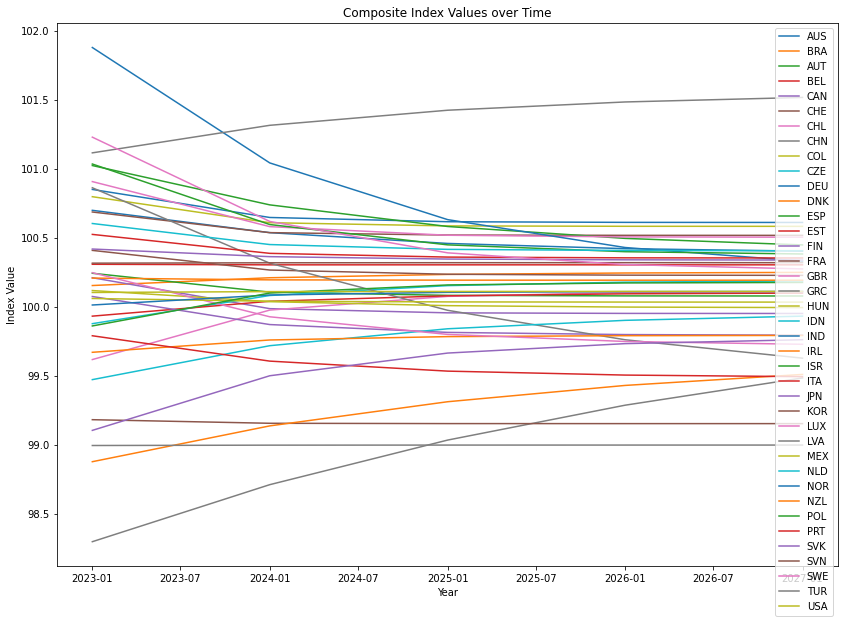

In [133]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 10))

# plot each country's index values as a line
for country in com_df.columns:
    ax.plot(com_df.index, com_df[country], label=country)

# set chart title and axis labels
ax.set_title('Composite Index Values over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Index Value')

# add a legend and show the chart
ax.legend(loc='best')
plt.show()